In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import scipy.linalg as la
from scipy.interpolate import interp1d

In [43]:
class Disk:
    def __init__(self, mu, kappa, radius=1.0, discretization_size=20,):
        """
        Initialize a Disk object with mass ratio, stiffness ratio, radius, and discretization size.
        Args:
            mu: Mass ratio between disk and blades (Md/mb).
            kappa: Stiffness ratio between disk and blades (kd/kb).
            radius: Radius of the disk.
            discretization_size: Number of points along each dimension to discretize the disk.
        """
        discretization_size = int(discretization_size)

        self.mu = mu
        self.kappa = kappa
        self.radius = radius
        self.discretization_size = discretization_size
        # Debug statement
        #print(f"Disk initialized with mu={mu}, kappa={kappa}, radius={radius}, discretization_size={discretization_size}")
        self.x, self.y = np.meshgrid(
            np.linspace(-radius, radius, discretization_size),
            np.linspace(-radius, radius, discretization_size)
        )
        self.mask = self.x**2 + self.y**2 <= radius**2  # Mask to create circular area

    def eigenvalues(self, mu,nodal_diameters):
        """
        Calculate the eigenvalues for the disk based on the given parameters.
        Args:
            mu: Mass ratio between disk and blades (Md/mb).
            nodal_diameters: Array of nodal diameters to evaluate.
        Returns:
            Eigenvalues for the disk and blade-dominated modes.

        Roque Corral Bladed Disks Flutter - mu = M_disk/M_blade, kappa = k_disk/k_blade, theta = nodal_diameter = n*delta_theta = 2*pi*n/N
        Eigenvalue Problem: mu*w^4 - ((mu-1) + 4*kappa*sin^2(theta) = 0
        """


    def calculate_natural_frequencies(self, nodal_diameters):
        """
        Calculate the natural frequencies for the disk based on the given parameters.
        Args:
            nodal_diameters: Array of nodal diameters to evaluate.
            disk_type: Type of disk (flexible or stiff).
        Returns:
            Natural frequencies for disk and blade-dominated modes.
        """

        omega_disk = 2 * np.sqrt(self.kappa / self.mu) * np.sin(nodal_diameters / 2)
        omega_blade = 1 - 2 * (self.kappa / self.mu) * (np.sin(nodal_diameters / 2) ** 2)

        
        # if disk_type == 'flexible':
        #     omega_disk = 2 * np.sqrt(self.kappa / self.mu) * np.sin(nodal_diameters / 2)
        #     omega_blade = 1 - 2 * (self.kappa / self.mu) * (np.sin(nodal_diameters / 2) ** 2)
        # else:#disk type is stiff
        #     omega_disk = 2 * np.sqrt(self.kappa / self.mu) * np.sin(nodal_diameters / 2) # stays same
        #     omega_blade = 1
        return omega_disk, omega_blade

    def simulate_oscillation(self, time):
        """
        Simulate oscillations for the disk object over time.
        Args:
            time: Array of time values to evaluate the oscillations.
        Returns:
            Array representing the disk oscillations over time.
        """
        omega = np.sqrt(self.kappa / self.mu)
        oscillations = np.sin(omega * time)
        return oscillations

def plot_natural_frequencies(nodal_diameters, omega_disk, omega_blade, title):
    """
    Plot natural frequencies versus nodal diameters.
    Args:
        nodal_diameters: Array of nodal diameters.
        omega_disk: Natural frequencies for the disk modes.
        omega_blade: Natural frequencies for the blade modes.
        title: Title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(nodal_diameters, omega_disk, label='Disk Mode Frequency (w_disk)', linestyle='--', color='r')
    plt.plot(nodal_diameters, omega_blade, label='Blade Mode Frequency (w_blade)', linestyle='-', color='b')
    plt.xlabel('Nodal Diameter')
    plt.ylabel('Natural Frequency')
    plt.title(title)
    plt.legend(fontsize = 'small', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

def animate_oscillations(disk, duration=10, fps=30):
    """
    Create an animation showing the disk's oscillations.
    Args:
        disk: Disk object to animate.
        duration: Duration of the animation in seconds.
        fps: Frames per second for the animation.
    Returns:
        HTML animation object for Jupyter Notebook.
    """
    time = np.linspace(0, duration, duration * fps)
    oscillations = disk.simulate_oscillation(time)

    fig, ax = plt.subplots()
    ax.set_xlim(-disk.radius, disk.radius)
    ax.set_ylim(-disk.radius, disk.radius)
    ax.set_aspect('equal')

    # Create a color mesh plot for the disk
    color_mesh = ax.pcolormesh(disk.x, disk.y, np.zeros_like(disk.x), cmap=cm.viridis, shading='auto')
    colorbar = plt.colorbar(color_mesh, ax=ax)
    colorbar.set_label('Displacement Amplitude')

    def update(frame):
        displacement = oscillations[frame] * disk.mask
        color_mesh.set_array(displacement.ravel())
        return color_mesh,

    ani = animation.FuncAnimation(fig, update, frames=len(time), blit=False, interval=1000/fps)
    plt.close(fig)
    return HTML(ani.to_jshtml())


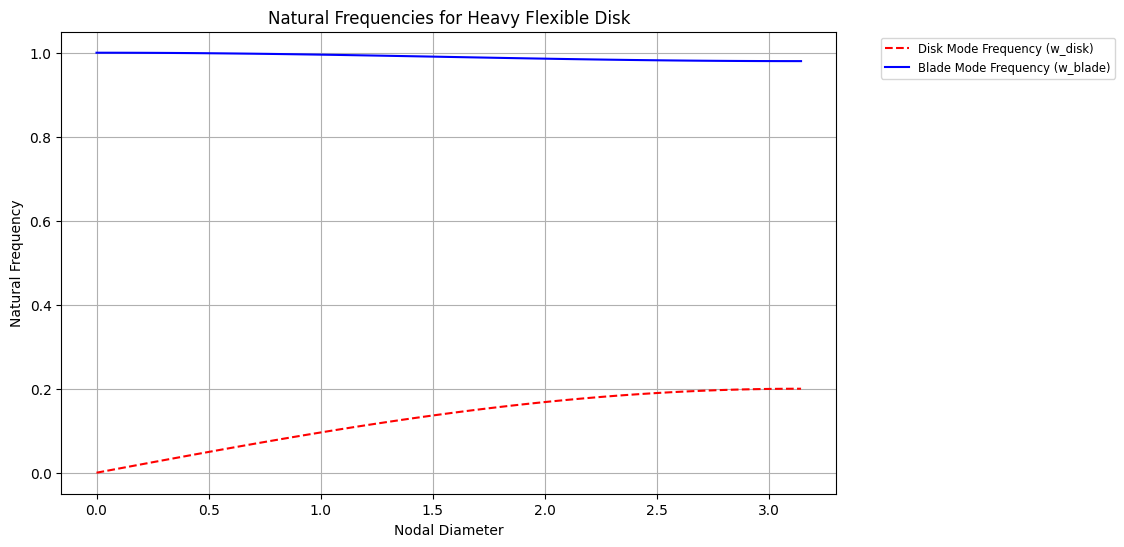

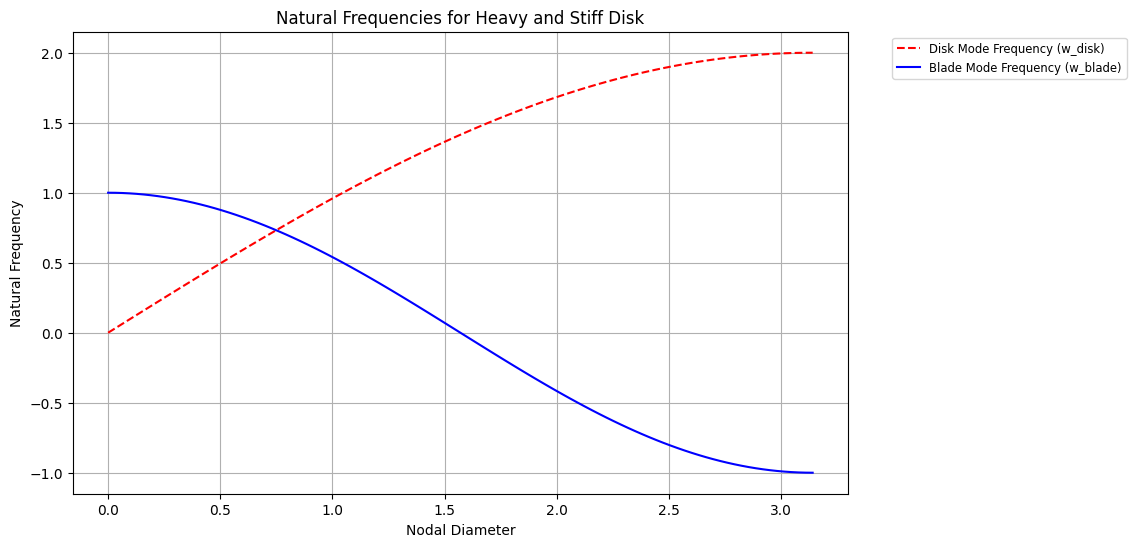

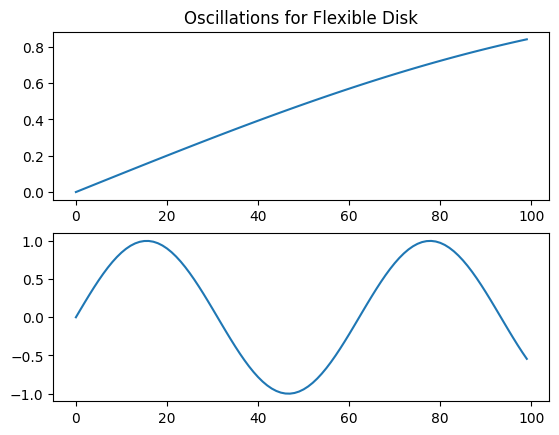

In [49]:
n_points = 100
# Define parameters for the "Heavy Flexible Disk" case
mu_flexible = 10  # Mass ratio: disk is much heavier than the blades
kappa_flexible = 0.1  # Stiffness ratio: disk is relatively flexible compared to blades
nodal_diameters = np.linspace(0, np.pi, n_points)

# Create a Disk object for the flexible disk
flexible_disk = Disk(mu_flexible, kappa_flexible, radius=1.0, discretization_size=n_points/2)

# Calculate natural frequencies for the flexible disk
omega_disk_flexible, omega_blade_flexible = flexible_disk.calculate_natural_frequencies(nodal_diameters)

# Oscillations
flexible_oscillations = flexible_disk.simulate_oscillation(np.linspace(0, 10, 100))

# Plot natural frequencies for the flexible disk
plot_natural_frequencies(nodal_diameters, omega_disk_flexible, omega_blade_flexible, 'Natural Frequencies for Heavy Flexible Disk')

# Animate the oscillations for the flexible disk
# animation_html = animate_oscillations(flexible_disk)
# display(animation_html)

# Define parameters for the "Heavy and Stiff Disk" case
mu_stiff = 10  # Mass ratio: disk is still much heavier
kappa_stiff = 10  # Stiffness ratio: disk is now much stiffer compared to blades

# Create a Disk object for the stiff disk
stiff_disk = Disk(mu_stiff, kappa_stiff, radius=1.0, discretization_size=n_points/2)

# Calculate natural frequencies for the stiff disk
omega_disk_stiff, omega_blade_stiff = stiff_disk.calculate_natural_frequencies(nodal_diameters)

# Oscillations
stiff_oscillations = stiff_disk.simulate_oscillation(np.linspace(0, 10, 100))

# Plot natural frequencies for the stiff disk
plot_natural_frequencies(nodal_diameters, omega_disk_stiff, omega_blade_stiff, 'Natural Frequencies for Heavy and Stiff Disk')

# Animate the oscillations for the stiff disk
# animation_html = animate_oscillations(stiff_disk)
# display(animation_html)


plt.subplot(2, 1, 1)    
plt.plot(flexible_oscillations)
plt.title('Oscillations for Flexible Disk')
plt.subplot(2, 1, 2)
plt.plot(stiff_oscillations)


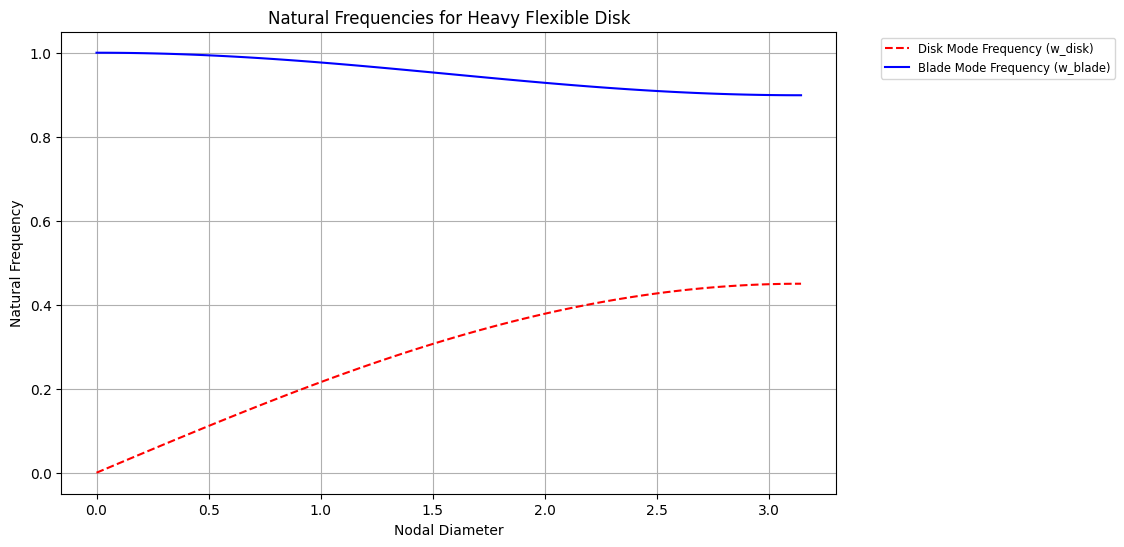

In [50]:
n_points = 100
# Define parameters for the "Heavy Flexible Disk" case
mu_flexible = 1  # Mass ratio: disk is much heavier than the blades
kappa_flexible = 0.050625  # Stiffness ratio: disk is relatively flexible compared to blades
nodal_diameters = np.linspace(0, np.pi, n_points)

# Create a Disk object for the flexible disk
flexible_disk = Disk(mu_flexible, kappa_flexible, radius=1.0, discretization_size=n_points/2)

# Calculate natural frequencies for the flexible disk
omega_disk_flexible, omega_blade_flexible = flexible_disk.calculate_natural_frequencies(nodal_diameters)

# Oscillations
flexible_oscillations = flexible_disk.simulate_oscillation(np.linspace(0, 10, 100))

# Plot natural frequencies for the flexible disk
plot_natural_frequencies(nodal_diameters, omega_disk_flexible, omega_blade_flexible, 'Natural Frequencies for Heavy Flexible Disk')


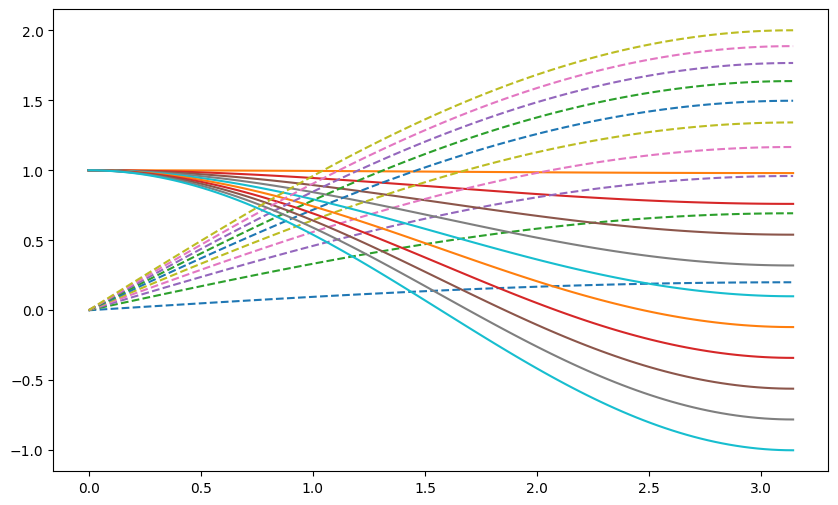

In [53]:
# Vary kappa from 0.1 to 10
mu_flexible = 10  # Mass ratio: disk is much heavier than the blades
kappas = np.linspace(0.1, 10, 10)
omega_disk_flexible = []
omega_blade_flexible = []

for kappa in kappas:
    # Create a Disk object for the flexible disk
    flexible_disk = Disk(mu_flexible, kappa, radius=1.0, discretization_size=n_points/2)

    # Calculate natural frequencies for the flexible disk
    omega_disk, omega_blade = flexible_disk.calculate_natural_frequencies(nodal_diameters)
    omega_disk_flexible.append(omega_disk)
    omega_blade_flexible.append(omega_blade)

# Plot natural frequencies for the flexible disk
plt.figure(figsize=(10, 6))

for i, kappa in enumerate(kappas):
    plt.plot(nodal_diameters, omega_disk_flexible[i], label=f'Disk Mode Frequency (w_disk) - kappa={kappa}', linestyle='--')
    plt.plot(nodal_diameters, omega_blade_flexible[i], label=f'Blade Mode Frequency (w_blade) - kappa={kappa}', linestyle='-')

# vary mu from 0.1 to 10